In [1]:
import imageio.v2 as imageio
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal


In [2]:
#load SPE file
multiimage = ski.io.MultiImage('20240723_CCD1.SPE') #Load SPE file
frames_number = len(multiimage[0])
print(frames_number)

143


In [3]:
frames_dfs= []
for i in range(frames_number):
    dataframe = pd.DataFrame(multiimage[0][i])
    frames_dfs.append(dataframe)
print(len(frames_dfs))

143


In [4]:
vertical = [] # this array is for absolulte total sum of intensities BUT along the .....
#basically, this means we are summing up columns together from one frame, then we go the next frame and sum up the columns
#and then add these to the previous frame's sum of columns. 

all_frames_sum = np.zeros(1023) #initialize the array for the columns sum we are about to create
for i in range(len(frames_dfs)): #for every frame in the SPE file
    lum_df = frames_dfs[i] #grab one frame of the SPE file
    one_frame_sum = []   #a transit variable for the sum of columns of one frame
    for j in range(1023): #number of rows
        array_ = lum_df.iloc[j, :] #grab a single row j
        horizontal_sum = np.sum(array_) #sum up the intensities in that row
        one_frame_sum.append(horizontal_sum) #append the sum of intensities in that row to one_frame_sum - first element of one_frame_sum is the sum of 
        #intensities in the first row
        
    all_frames_sum = np.add(all_frames_sum, one_frame_sum) #after the first frame sum of columns is calculated, add it to the all_frames_sum array, which will 
    #accumulate the intensity values along the vertical from all the frames, so that we can denote the boundaries between the race tubes better. 

[   3   78  119  154  184  237  269  351  415  445  478  511  554  599
  656  697  730  782  817  860  903  935  971 1001]


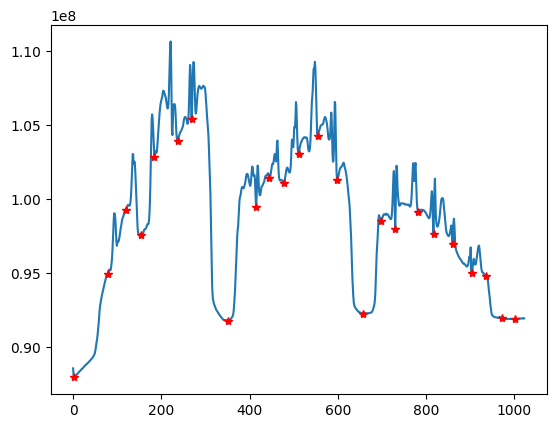

In [5]:
troughs = []
peaks, properties = signal.find_peaks(all_frames_sum, distance = 30) #find peaks of luminescence along the vertical
troughs, props = signal.find_peaks(all_frames_sum*(-1), distance = 30) #find troughs of luminescence along the vertical - this will determine the indices of bounds between race tubes
#print(peaks)
print(troughs) #print troughs, since the boundaries between tubes are places where luminescence is lowest
peak_lum = all_frames_sum[peaks]
troughs_lum = all_frames_sum[troughs] #get the luminescence intensity values on the trough coordinates
plt.figure()
plt.plot(all_frames_sum) #plot how luminescence sum changes along the vertical from top to bottom of the frame in the SPE file
#plt.plot(peaks, peak_lum, "r*")
plt.plot(troughs, troughs_lum, "r*") #plot troughs
plt.show()


In [6]:
arrays = []
left_x = 100
right_x = 1000# depending on how far your Neurospora grew, you can also write an array of rigth bounds for every single tube
#select the rightmost bound
arrays_to_detrend = []
for j in range(20):
    lum_array = []
    increment = (right_x - left_x)//(len(frames_dfs))
    for i in range(len(frames_dfs)):
        df = frames_dfs[i]
        #sum = df.iloc[troughs_og[j]:troughs_og[j+1], left_x:(left_x + (i+1)*increment)].sum().sum()# #This is code for incremental pushing of bounds to the left; works when 
        #when there is right bound set for every race tube
        sum = df.iloc[troughs[j+2]:troughs[j+3], left_x:right_x].sum().sum()
        #sum = df.iloc[troughs_og[j+2]:troughs_og[j+3], left_x:right_x[i]].sum().sum() - #code for when there is a different right bound set for every race tube
        background = df.iloc[0:50, 100:900].sum().sum() #select bounds for background from the image in the WinView software
        sum_to_append = sum - background
        lum_array.append(sum_to_append)
    arrays_to_detrend.append(lum_array)

print(len(arrays_to_detrend)) 




20


[0, 22, 44, 66, 88, 110, 132]
1


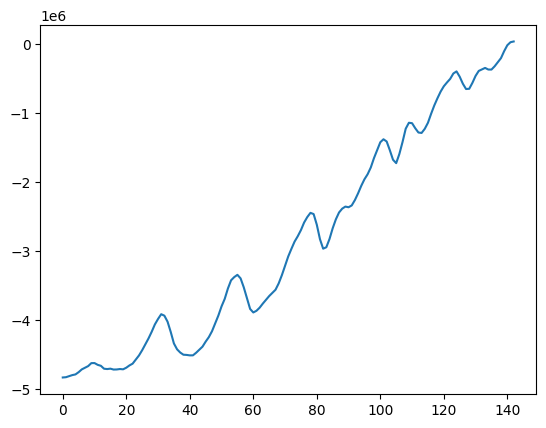

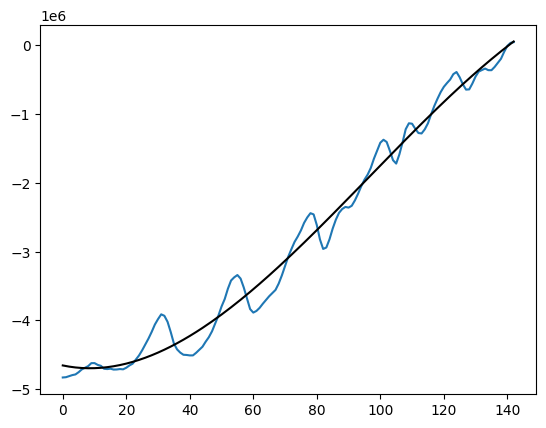

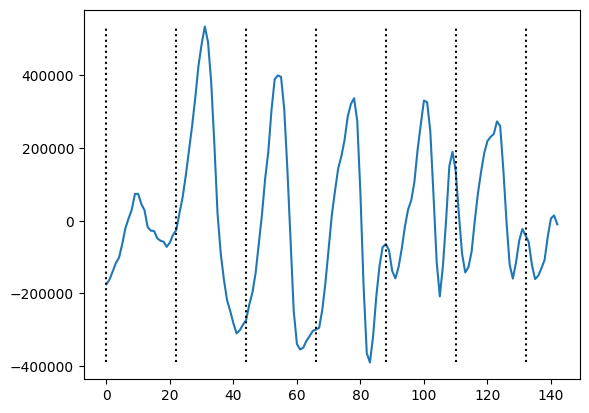

2


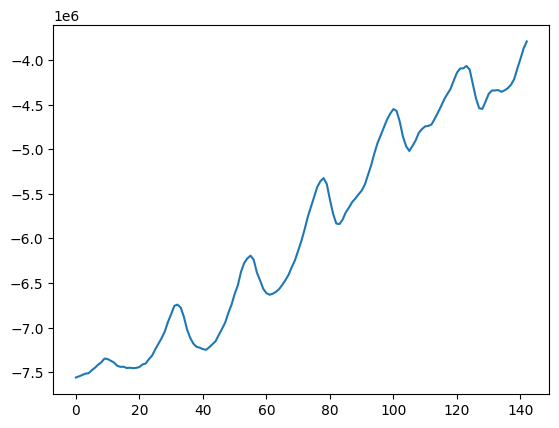

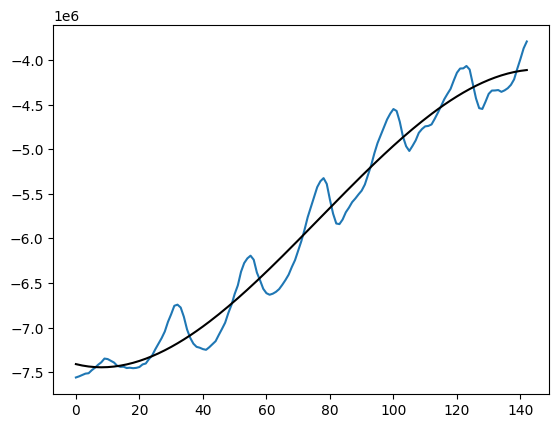

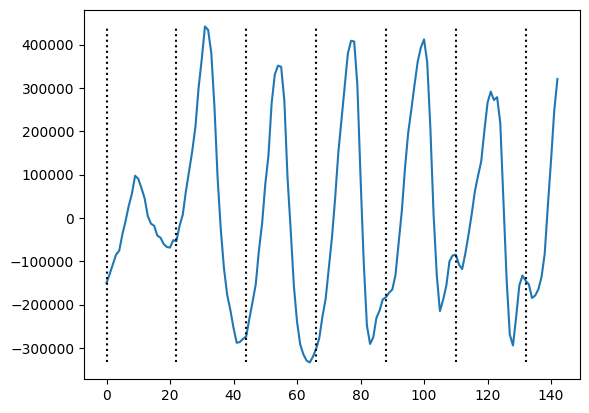

3


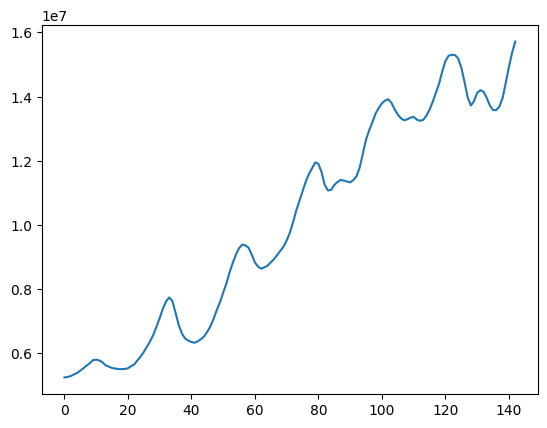

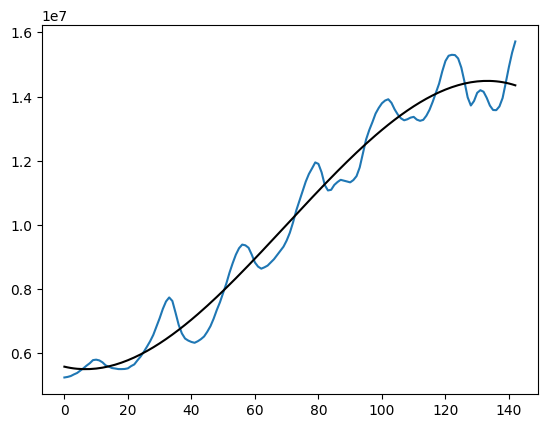

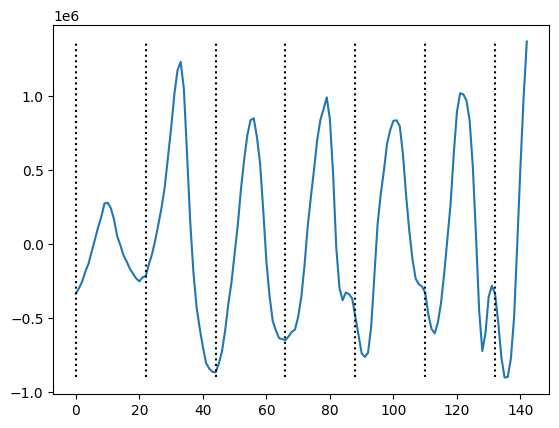

4


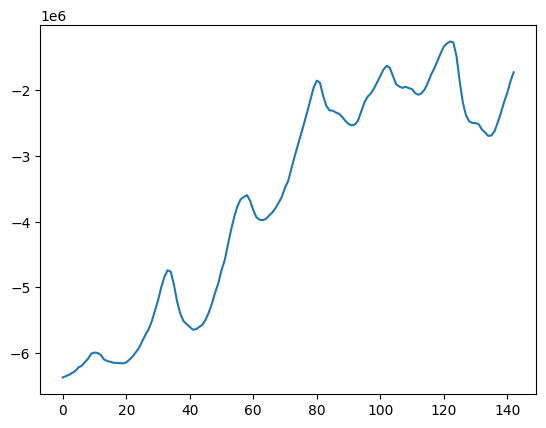

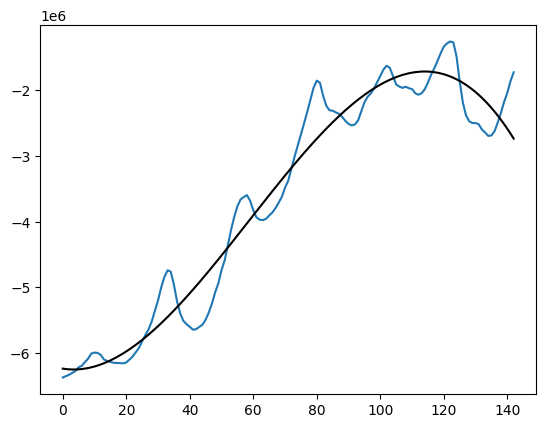

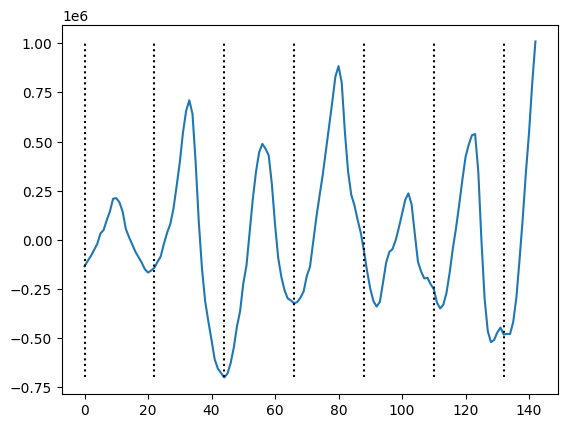

5


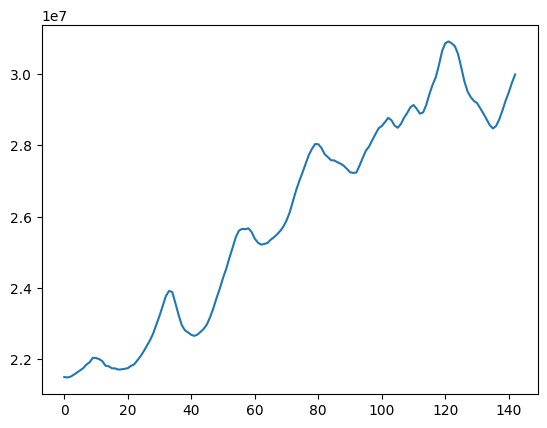

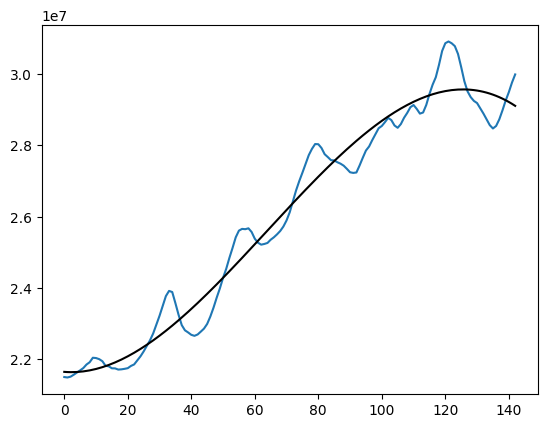

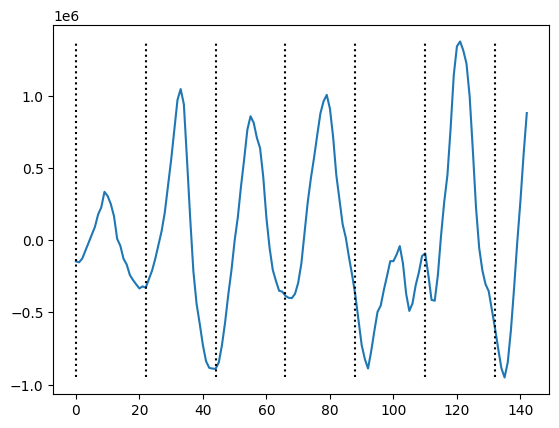

6


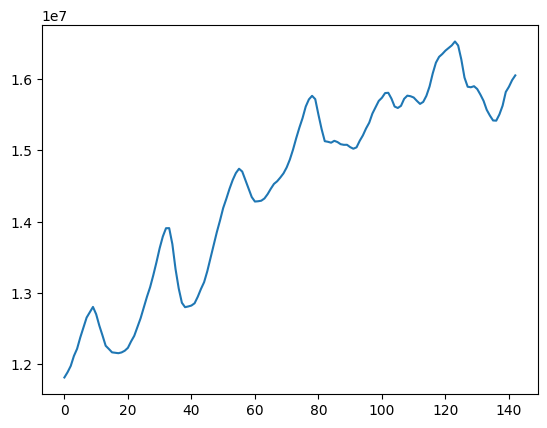

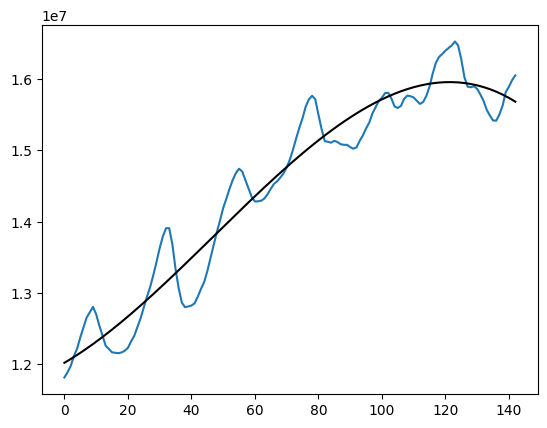

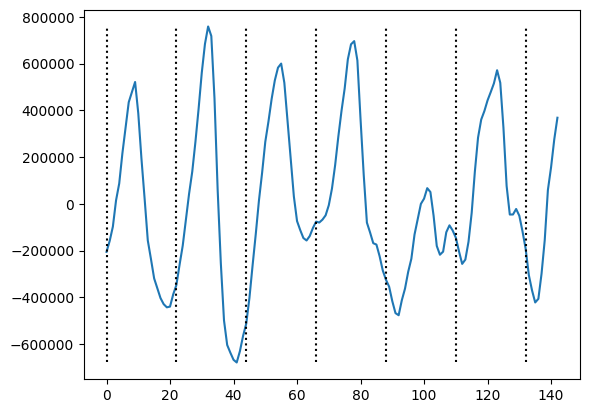

7


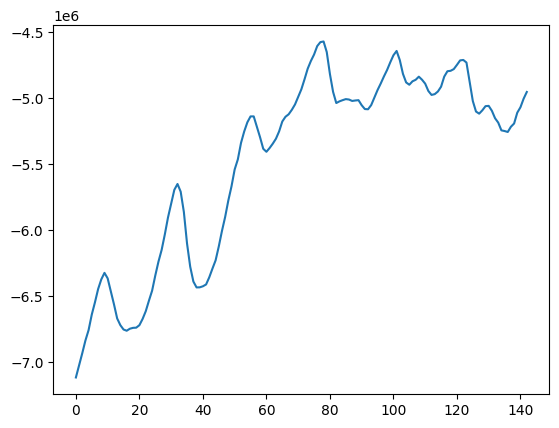

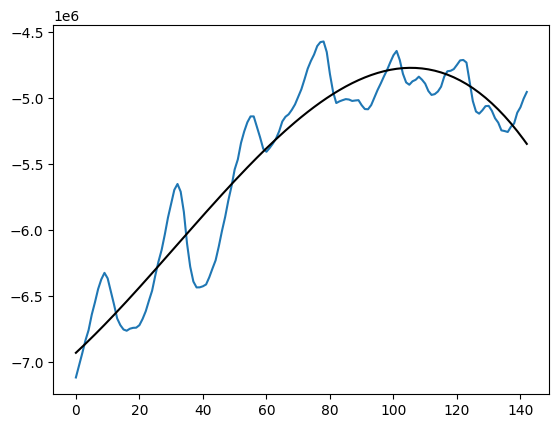

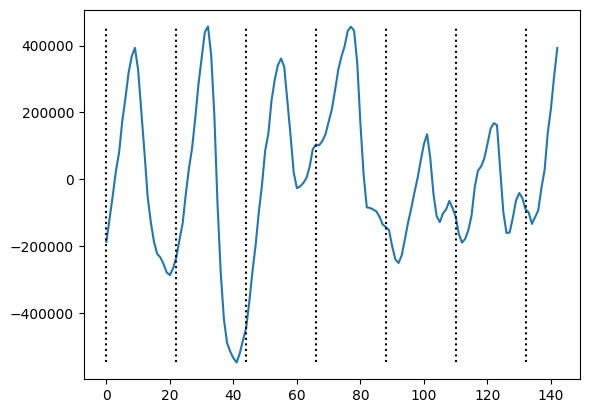

8


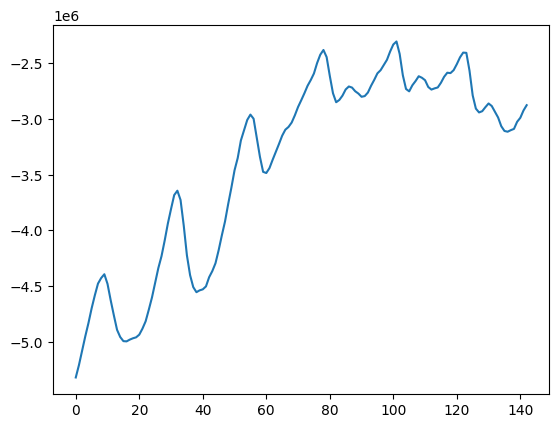

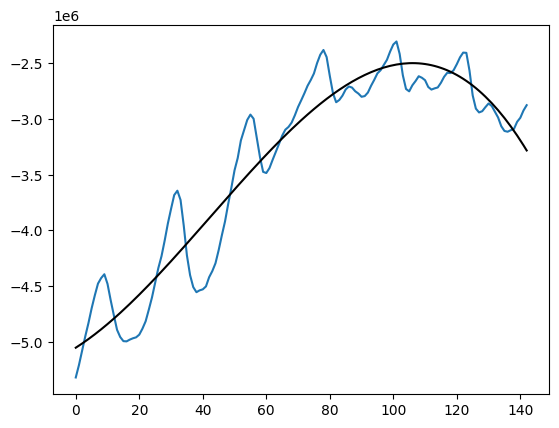

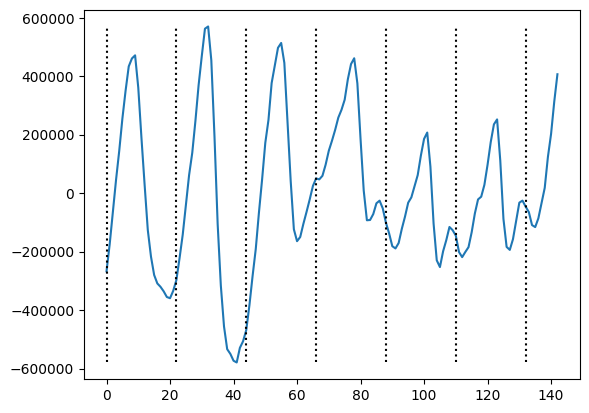

9


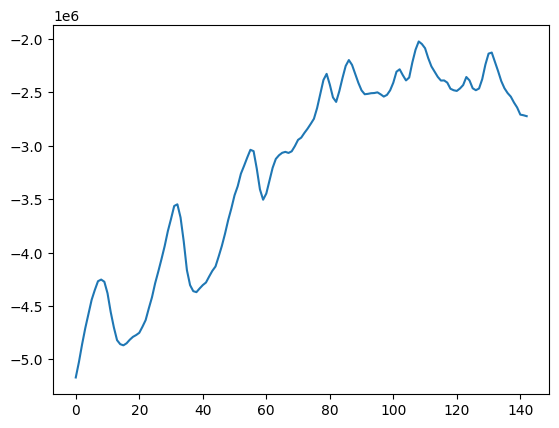

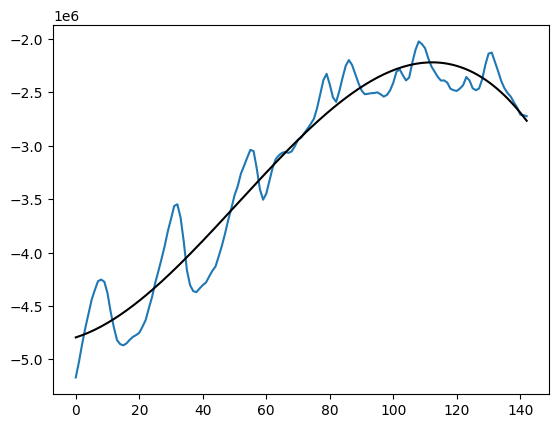

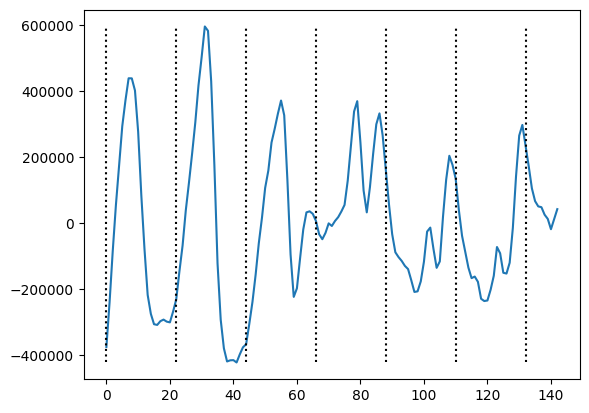

10


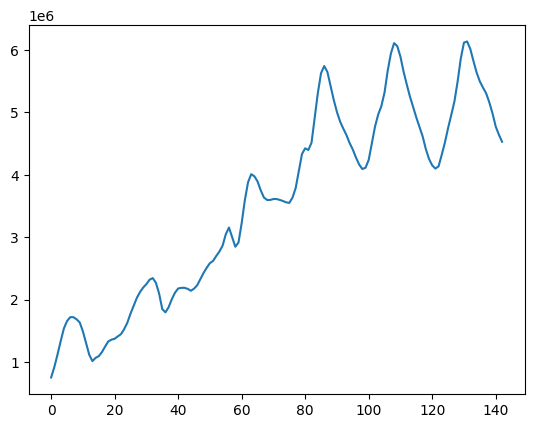

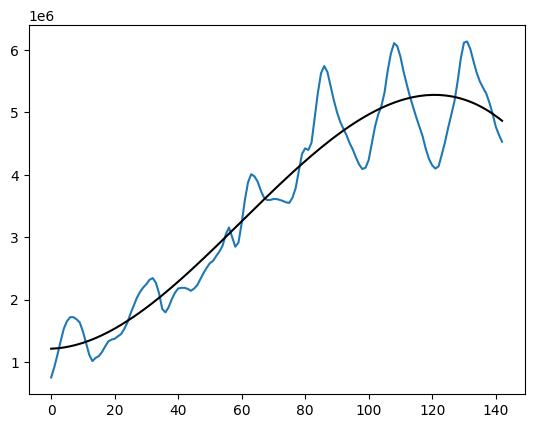

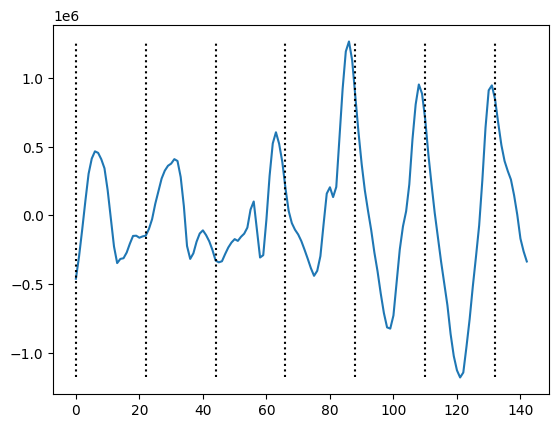

11


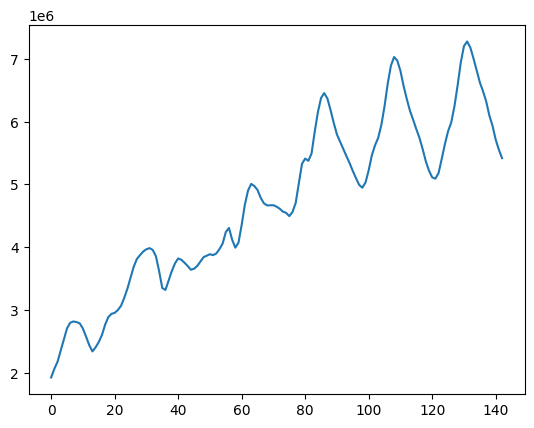

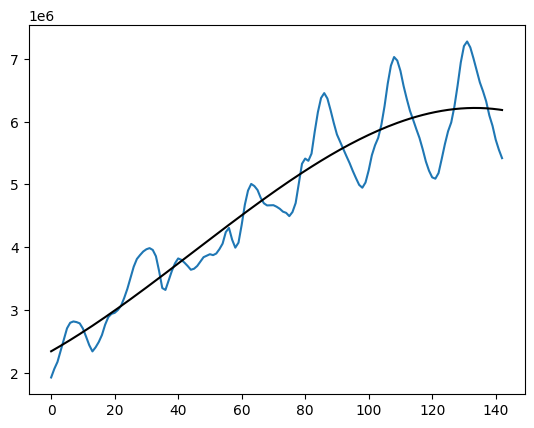

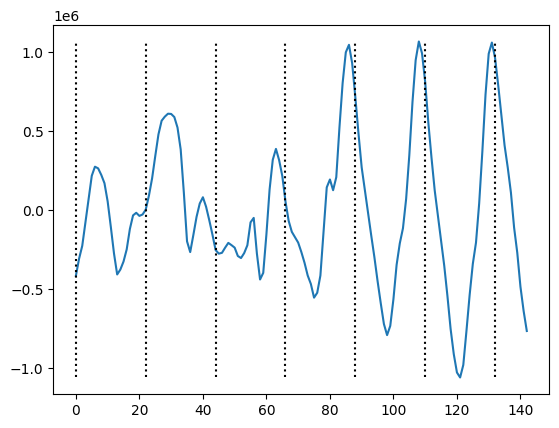

12


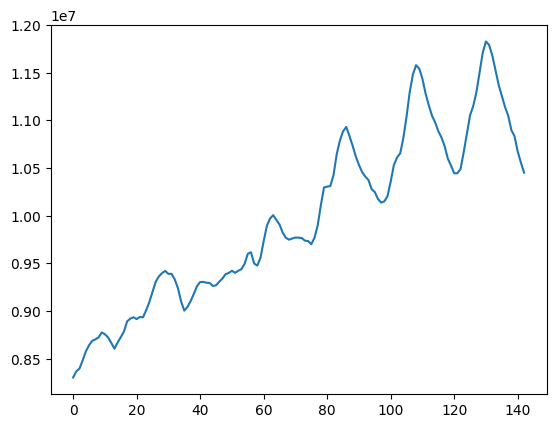

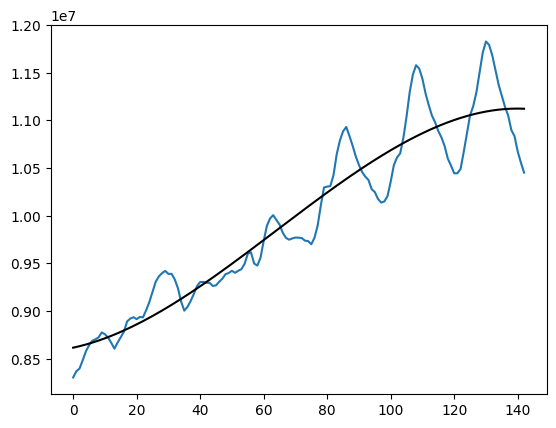

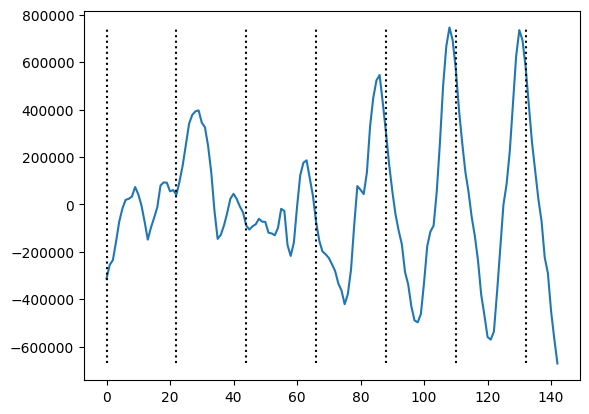

13


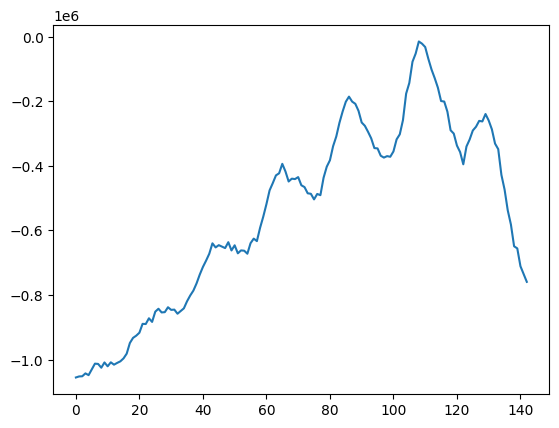

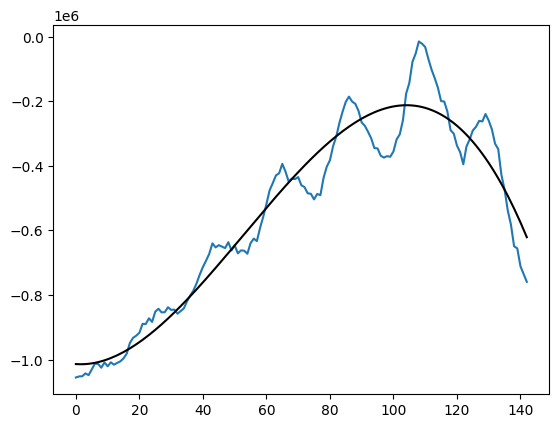

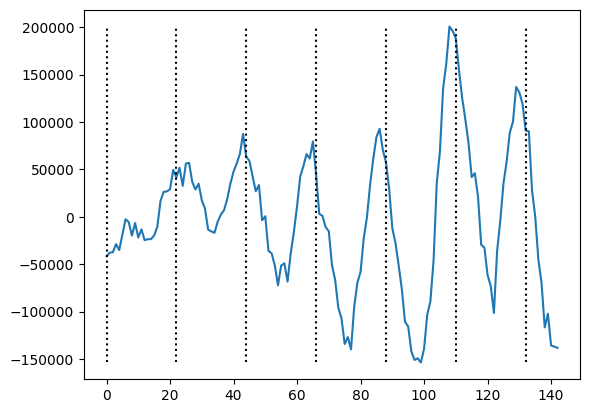

14


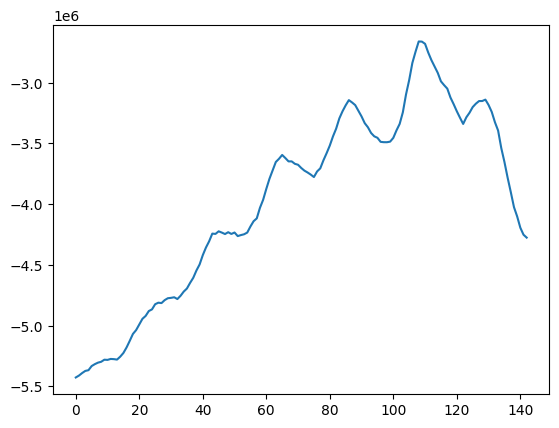

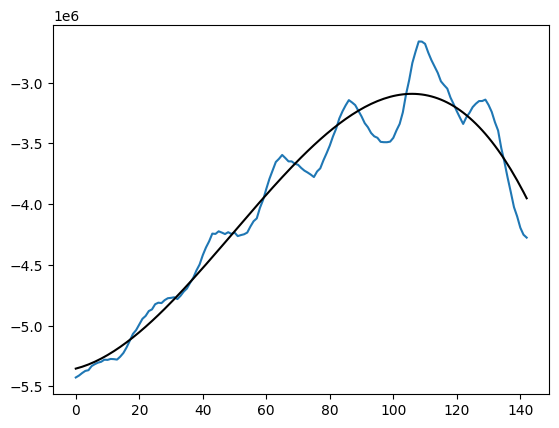

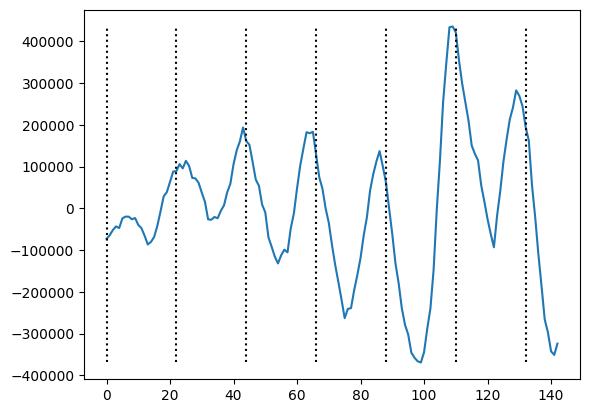

15


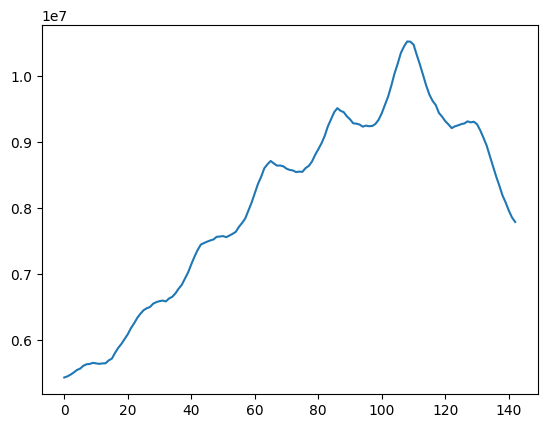

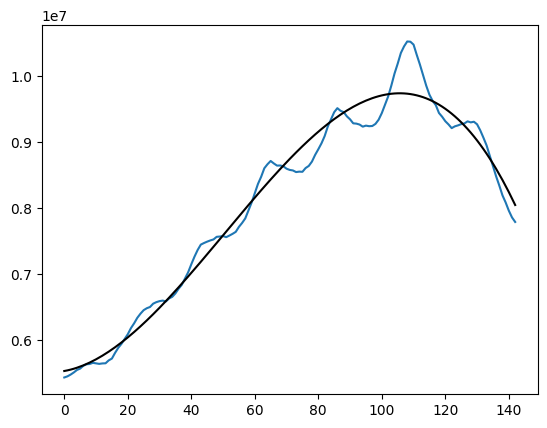

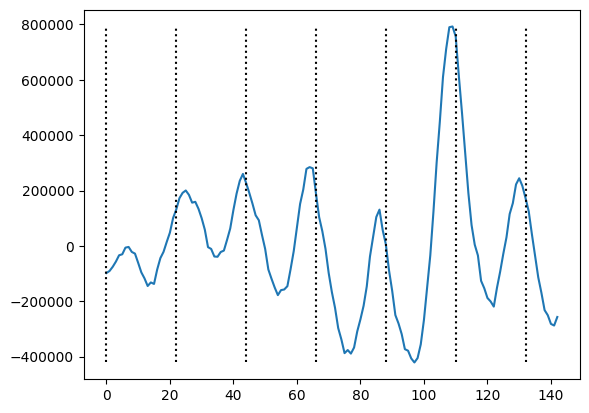

16


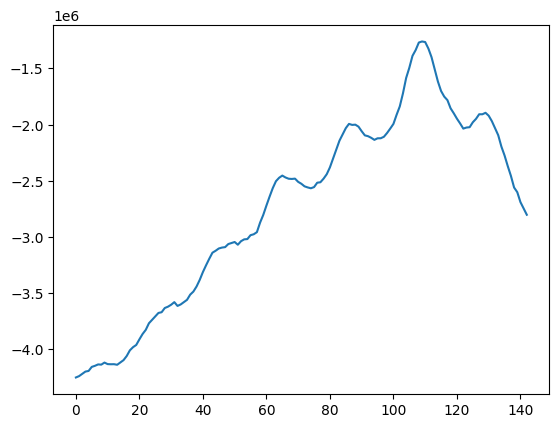

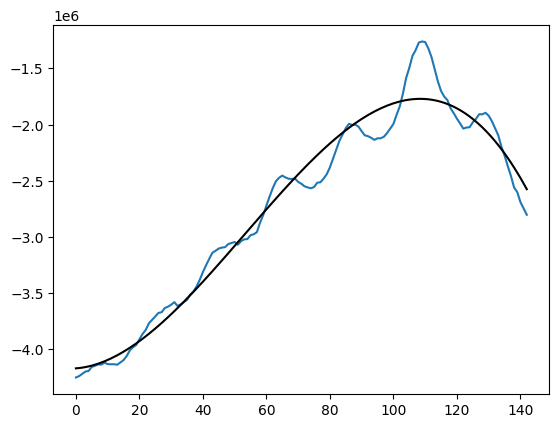

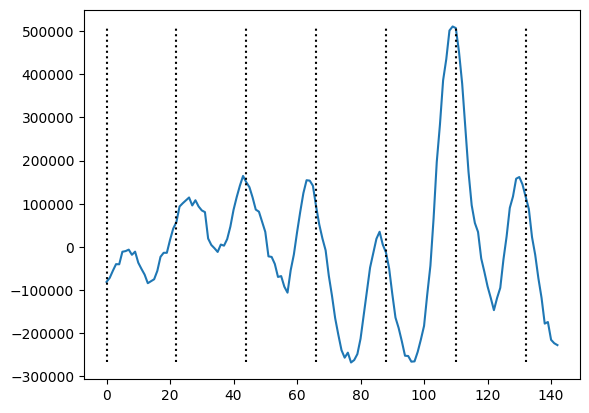

17


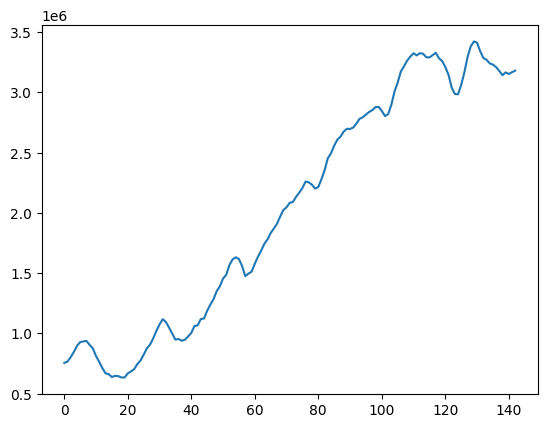

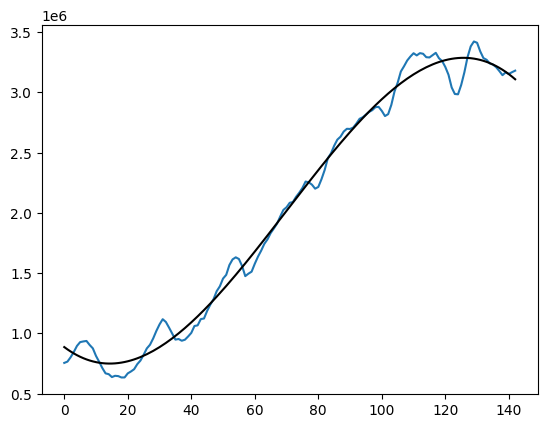

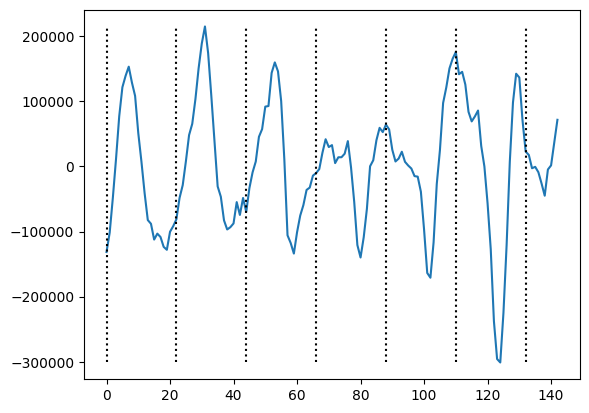

18


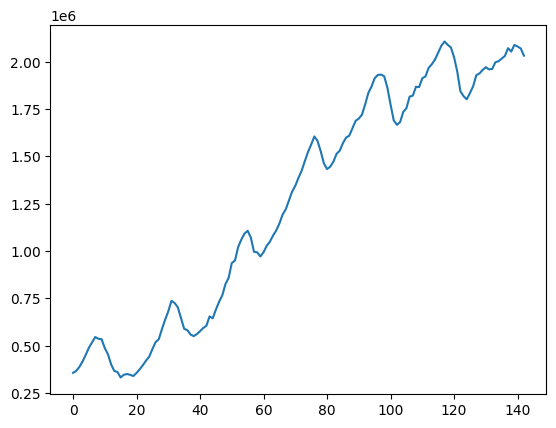

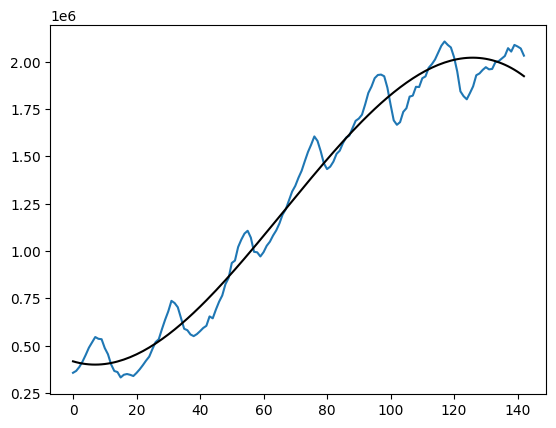

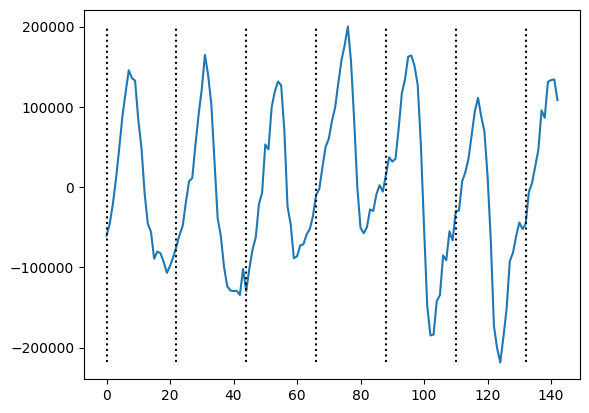

19


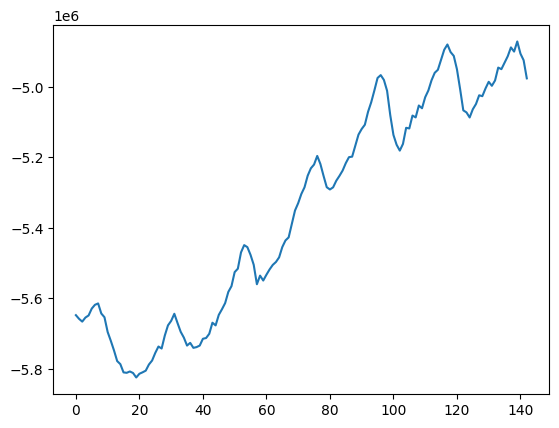

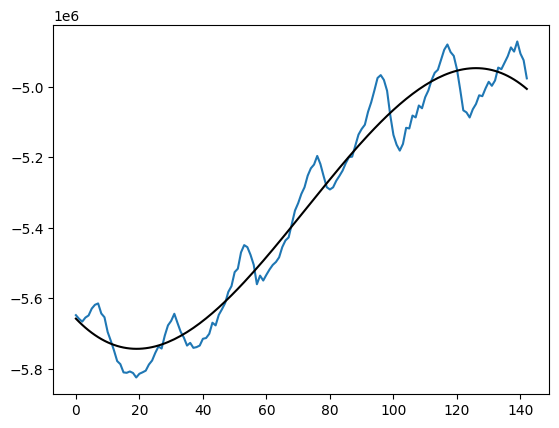

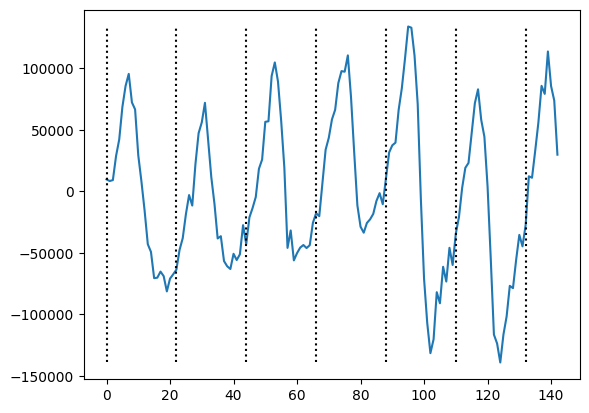

20


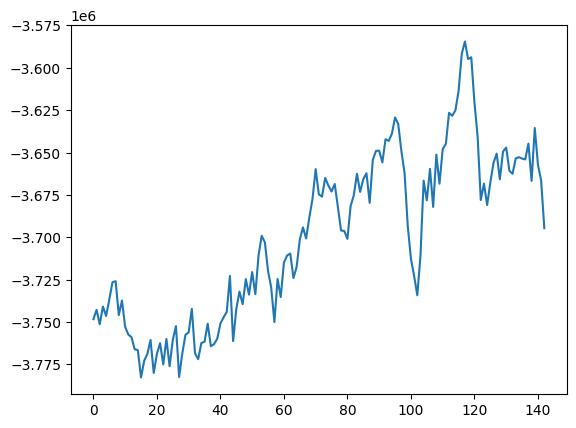

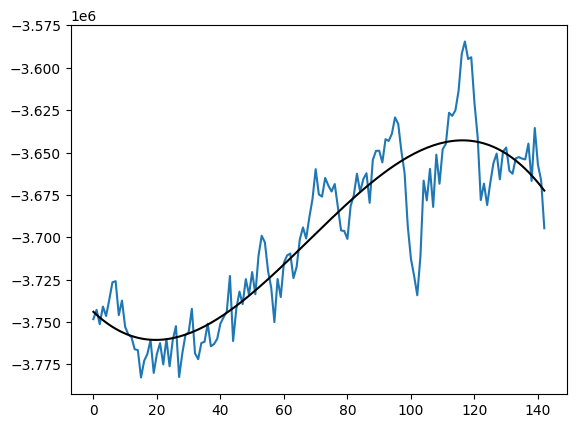

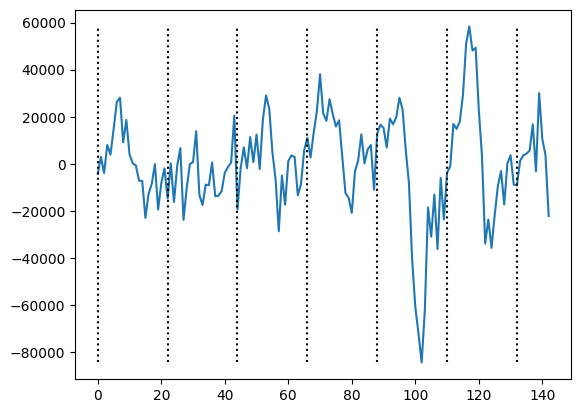

In [7]:
import numpy as np
import matplotlib.pyplot as plt

vertical_lines_coordinates = []
hours = len(frames_dfs)
days = hours//22
for i in range(7):
    vertical_lines_coordinates.append(i*22)
print(vertical_lines_coordinates)
detrended_ = []
for i in range(len(arrays_to_detrend)):
    print(i+1)
    x = np.arange(len(arrays_to_detrend[i]))
    y = arrays_to_detrend[i]
    y = y
#plot to show raw luminescence
    plt.plot(x, y)
    plt.show()

#linear regression to find the trend
    model = np.polyfit(x, y, 3)
    predicted = np.polyval(model, x)
    
    

#plot to show the trend
    plt.plot(x, y)
    plt.plot(x, predicted, 'k-')
    plt.show()
#plot to show the detrended luminescence signal
    plt.plot(x, y - predicted)
    plt.vlines(x = vertical_lines_coordinates, ymin = min(y - predicted), ymax = max(y - predicted), colors = 'black', linestyles='dotted')
    plt.show()
   